In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import collections


### CSV 파일에서 데이터를 원하는 형태로 가공하기

In [71]:
# csv 파일 읽기
df = pd.read_csv("creditcard.csv")

# 492 fraudulent transactions, 284,315 normal transactions.
# 0.172% of transactions were fraud.
print(df.values.shape[0])
print(df.values.shape)
print(df.Class.value_counts())
print(df.Time.values)

284807
(284807, 31)
0    284315
1       492
Name: Class, dtype: int64
[0.00000e+00 0.00000e+00 1.00000e+00 ... 1.72788e+05 1.72788e+05
 1.72792e+05]


In [72]:
df[:10]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [73]:
print(type(df.Class))
print(type(df['Class']))
aa = df[['Class']]
bb = df[['Class', 'Amount']]
print(type(aa))
print(type(bb))
print(aa.values.shape)
print(bb.values.shape)
len(df.Time.values)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(284807, 1)
(284807, 2)


284807

In [74]:
df[df.Class == 1].count()

Time      492
V1        492
V2        492
V3        492
V4        492
V5        492
V6        492
V7        492
V8        492
V9        492
V10       492
V11       492
V12       492
V13       492
V14       492
V15       492
V16       492
V17       492
V18       492
V19       492
V20       492
V21       492
V22       492
V23       492
V24       492
V25       492
V26       492
V27       492
V28       492
Amount    492
Class     492
dtype: int64

In [75]:
df.V2.value_counts()

 0.166975    77
-0.326668    77
 0.089735    62
-0.606529    60
-0.146975    53
 0.393051    48
 0.389198    45
 1.036663    40
 0.331464    39
 0.447474    36
-0.033577    36
-0.207740    35
-0.367489    30
 0.033896    28
 0.075028    27
-0.715029    27
-1.197678    26
 0.008527    25
-0.699902    25
-0.023838    24
 0.185411    24
 1.265621    24
-1.213639    23
-0.528597    23
 0.273058    21
-0.300112    21
-0.434463    21
 0.457969    21
-0.364010    20
-0.958269    19
             ..
-0.895296     1
 0.133219     1
 0.791998     1
 2.623280     1
-0.704504     1
 0.133674     1
-0.031065     1
-7.852369     1
-0.365261     1
-0.853673     1
 0.140413     1
 1.502102     1
 0.829049     1
 1.050976     1
-0.092252     1
-0.385766     1
-0.427667     1
 1.194539     1
 1.344977     1
 1.901399     1
-0.265412     1
 1.348840     1
 0.385590     1
-0.642216     1
 5.099359     1
 0.520114     1
-0.419199     1
-0.303794     1
 0.167497     1
-0.166213     1
Name: V2, Length: 275663

In [0]:
# Create a new feature for normal (non-fraudulent) transactions.
# Normal column has inverse value of Class column 
df.loc[df.Class == 0, 'Normal'] = 1
df.loc[df.Class == 1, 'Normal'] = 0

In [77]:
# Rename 'Class' to 'Fraud'
# Class -> Fraud 로 명 변환
df = df.rename(columns = {'Class' : 'Fraud'})


# max column 수 설정
pd.set_option('display.max_columns',  101)
# print(df.head())

# Create dataframes of only Fraud and Normal transactions.
Fraud = df[df.Fraud == 1]
Normal = df[df.Normal == 1]
print('Fraud  : ', len(Fraud))
print('Normal : ', len(Normal))

Fraud  :  492
Normal :  284315


In [78]:
print(df.Normal.value_counts())
df.Fraud.value_counts()

1.0    284315
0.0       492
Name: Normal, dtype: int64


0    284315
1       492
Name: Fraud, dtype: int64

In [79]:
for_train[:5]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud,Normal
0,100902.0,1.908902,-0.669120,-0.114980,0.264529,-0.595843,0.603159,-1.203876,0.300718,2.606065,-0.213019,1.189008,-2.281706,0.650900,1.514962,-0.411332,0.990916,-0.216454,1.041724,-0.114399,-0.187281,-0.090820,-0.048897,0.293753,0.154149,-0.638667,0.423484,-0.058530,-0.049864,39.00,0,1.0
1,135812.0,-0.008638,0.131883,0.635344,-0.399317,0.577579,0.332326,0.527800,-0.133700,0.232359,0.004998,-0.003635,0.619642,0.684039,-0.323506,-0.354839,0.616552,-1.259022,0.500995,0.814613,0.048418,-0.179809,-0.340650,0.142739,-1.047634,-1.118483,-0.115849,-0.163665,-0.089465,65.91,0,1.0
2,159914.0,1.880701,-0.034917,-0.698435,1.484986,-0.299145,-1.002989,0.147486,-0.279035,0.469875,0.193943,-0.465595,0.708619,0.340083,0.192576,0.076515,-0.277451,-0.309101,-0.435506,-0.673627,-0.182125,0.136601,0.515065,0.126878,0.399356,0.054687,-0.622530,0.021559,-0.032091,46.47,0,1.0
3,161123.0,-0.026897,1.515108,-1.569530,-0.104253,1.051111,-1.782796,1.336510,-0.133662,-0.871216,-1.183370,-0.461643,0.235192,0.509155,-0.281912,0.183666,-0.410558,0.888893,0.136806,-0.002083,-0.198616,0.267003,0.795362,-0.206794,-0.059156,-0.098000,-0.149678,-0.015099,0.047084,7.19,0,1.0
4,118756.0,-0.634777,-1.605719,0.140014,-1.538825,-1.805853,0.699661,1.630540,-0.016779,-0.933695,-0.325517,0.302300,-0.312938,-0.285298,-0.336641,-1.468824,1.302678,-0.078134,-0.955677,0.941878,1.114855,0.199409,-0.372449,1.347100,-0.534399,-0.527257,-0.654911,-0.101362,0.074394,527.17,0,1.0


In [80]:
print(df[df.Fraud==1][['Fraud', 'Normal']])

        Fraud  Normal
541         1     0.0
623         1     0.0
4920        1     0.0
6108        1     0.0
6329        1     0.0
6331        1     0.0
6334        1     0.0
6336        1     0.0
6338        1     0.0
6427        1     0.0
6446        1     0.0
6472        1     0.0
6529        1     0.0
6609        1     0.0
6641        1     0.0
6717        1     0.0
6719        1     0.0
6734        1     0.0
6774        1     0.0
6820        1     0.0
6870        1     0.0
6882        1     0.0
6899        1     0.0
6903        1     0.0
6971        1     0.0
8296        1     0.0
8312        1     0.0
8335        1     0.0
8615        1     0.0
8617        1     0.0
...       ...     ...
251891      1     0.0
251904      1     0.0
252124      1     0.0
252774      1     0.0
254344      1     0.0
254395      1     0.0
255403      1     0.0
255556      1     0.0
258403      1     0.0
261056      1     0.0
261473      1     0.0
261925      1     0.0
262560      1     0.0
262826    

In [81]:
# Set X_train equal to 80% of the fraudulent transactions.
FraudSample  = Fraud.sample(frac=0.8)
NormalSample = Normal.sample(frac=0.8)
count_Frauds = len(FraudSample)
# Add 80% of the normal transactions to X_train.
for_train = pd.concat([FraudSample, NormalSample], axis=0)

# X_test contains all the transaction not in X_train.
for_test = df.loc[~df.index.isin(for_train.index)]

print('len(for_train)  : ',len(for_train))
print('len(for_test)   : ',len(for_test))

len(for_train)  :  227846
len(for_test)   :  56961


In [82]:
#Shuffle the dataframes so that the training is done in a random order.
for_train = for_train.sample(frac=1).reset_index(drop=True)
for_test = for_test.sample(frac=1).reset_index(drop=True)
#for_test = np.random.shuffle(for_test)

# Add our target features to y_train and y_test.
X_train = for_train.drop(['Fraud', 'Normal'], axis = 1)
# Drop target features from X_train and X_test.
# Fraud, Normal 컬럼 drop
y_train = for_train[['Fraud', 'Normal']]

# Add our target features to y_train and y_test.
X_test = for_test.drop(['Fraud', 'Normal'], axis = 1)
# Drop target features from X_train and X_test.
#  Fraud, Normal 컬럼 drop
y_test = for_test[['Fraud', 'Normal']]

#Check to ensure all of the training/testing dataframes are of the correct length
print('len(X_train) : ',len(X_train))
print('len(y_train) : ',len(y_train))
print('len(X_test)  : ',len(X_test))
print('len(y_test)  : ',len(y_test))

len(X_train) :  227846
len(y_train) :  227846
len(X_test)  :  56961
len(y_test)  :  56961


In [83]:
y_train[0:5]

,Fraud,Normal
0,0,1.0
1,0,1.0
2,0,1.0
3,0,1.0
4,0,1.0


In [84]:
'''
Due to the imbalance in the data, ratio will act as an equal weighting system for our model. 
By dividing the number of transactions by those that are fraudulent, ratio will equal the value that when multiplied
by the number of fraudulent transactions will equal the number of normal transaction. 
Simply put: # of fraud * ratio = # of normal
'''

ratio = len(X_train) / count_Frauds
print('ratio :', ratio)

y_train.Fraud *= ratio*3
y_test.Fraud *= ratio*3


ratio : 578.2893401015228


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [85]:
columns_names = X_train.columns.values
print('columns_names : ',columns_names)

# Normalize
for feature in columns_names:
    mean, std = df[feature].mean(), df[feature].std()
    # print('feature :',feature , 'mean : ', mean , 'std :', std)
    X_train.loc[:, feature] = (X_train[feature] - mean) / std
    X_test.loc[:, feature] = (X_test[feature] - mean) / std

columns_names :  ['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount']


In [86]:
'''
Train the Neural Net
'''

# Split the testing data into validation and testing sets
split = int(len(y_test)/2)
print('split : ', split)

train_x = X_train.as_matrix()
train_y = y_train.as_matrix()
valid_x = X_test.as_matrix()[:split]
valid_y = y_test.as_matrix()[:split]
test_x = X_test.as_matrix()[split:]
test_y = y_test.as_matrix()[split:]

print('type(inputX)  : ', type(train_x))
print('type(X_train) : ', type(X_train))

print('y_train.Normal.value_counts() :',y_train.Normal.value_counts())
print('y_train.Fraud.value_counts() :',y_train.Fraud.value_counts())

print('y_test.Normal.value_counts() :',y_test.Normal.value_counts())
print('y_test.Fraud.value_counts() :',y_test.Fraud.value_counts())

print('C valid_y', np.where(valid_y[:, 0] > 0, 1, 0).sum())
print('C test_y ', np.where(test_y[:, 0] > 0, 1, 0).sum())

print('inputX :',train_x.shape)
print('inputY :',train_y.shape)
print('valid_x :',valid_x.shape)
print('valid_y :',valid_y.shape)
print('test_x :',test_x.shape)
print('test_y :',test_y.shape)

split :  28480
type(inputX)  :  <class 'numpy.ndarray'>
type(X_train) :  <class 'pandas.core.frame.DataFrame'>
y_train.Normal.value_counts() : 1.0    227452
0.0       394
Name: Normal, dtype: int64
y_train.Fraud.value_counts() : 0.00000       227452
1734.86802       394
Name: Fraud, dtype: int64
y_test.Normal.value_counts() : 1.0    56863
0.0       98
Name: Normal, dtype: int64
y_test.Fraud.value_counts() : 0.00000       56863
1734.86802       98
Name: Fraud, dtype: int64
C valid_y 46
C test_y  52
inputX : (227846, 30)
inputY : (227846, 2)
valid_x : (28480, 30)
valid_y : (28480, 2)
test_x : (28481, 30)
test_y : (28481, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages

In [0]:
# Confusion Matrix
def get_conf_rate(model, testX, testY):
    # 모델 예측
    predicted_y = model.predict(testX)

    # compare predicted_y & testY
    conf_cnt = collections.defaultdict(int)
    for pr_y, real_y in zip(predicted_y, testY):
        conf = np.argmax(pr_y), np.argmax(real_y)
        conf_cnt[conf] += 1

    # 0번방 == Fraud, 1번방 == Normal
    TP = conf_cnt[(0 ,0)]
    FN = conf_cnt[(1, 0)]
    TN = conf_cnt[(1, 1)]
    FP = conf_cnt[(0, 1)]

    Acc = (TP + TN) / (TP + TN + FP + FN)
    try:
        Precision = TP / (TP + FP)
    except: # 학습초기에 decision by zero 발생 가능 (범죄라고 판단한 건수가 zero인 상황
        Precision = 0
      
    try:
        Recall = TP / (TP + FN)
    except:
        Recall = 0
        raise

    print('\nTP :', TP, ' FN :',FN , ' TN :', TN, ' FP :', FP)
    print('Recall: %.3f, Precision: %.3f, Acc: %.3f' % (Recall, Precision, Acc))
    return Recall, Precision, Acc

In [0]:
# Callback Class
class mykerasCB(keras.callbacks.Callback):
    def __init__(self):
        super(mykerasCB, self).__init__() # 부모 클래스의 constructor 호출
        self.hist = [] # confusion matrix값 (비율)을 기록하기 위한 것

    def on_epoch_end(self, epoch, logs):
        if epoch % 10 == 9: # 10번 epoch 마다 출력해보기
          confusion = get_conf_rate(self.model, test_x, test_y)
          self.hist.append(confusion)
    def on_batch_end(self, batch, logs):
        pass
        

In [89]:
# Number of input nodes.
input_nodes = train_x.shape[1]

# Multiplier maintains a fixed ratio of nodes between each layer.
mulitplier = 1.5

# Number of nodes in each hidden layer
hidden_nodes1 = 18
hidden_nodes2 = round(hidden_nodes1 * mulitplier)
hidden_nodes3 = round(hidden_nodes2 * mulitplier)
print('노드수', hidden_nodes1, hidden_nodes2, hidden_nodes3)

노드수 18 27 40


In [90]:
print('======================  Keras   ======================')
# 모델 구성하기
model = Sequential()
model.add(Dense(hidden_nodes1, input_dim=input_nodes, activation='sigmoid'))
model.add(Dense(hidden_nodes2, activation='tanh'))
model.add(Dense(hidden_nodes3, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

# Callback Class 선언
cb = mykerasCB()

# 모델 학습과정 설정하기
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])

======================  Keras   ======================


In [97]:
# 모델 학습시키기
hist = model.fit(train_x, train_y, epochs=50, batch_size=1024,
                 callbacks = [cb], verbose=1)

Epoch 1/50
227846/227846 [==============================] - 1s 4us/step - loss: 2599.4386 - acc: 0.9419
Epoch 2/50
227846/227846 [==============================] - 1s 4us/step - loss: 2599.4231 - acc: 0.9435
Epoch 3/50
227846/227846 [==============================] - 1s 4us/step - loss: 2599.4277 - acc: 0.9412
Epoch 4/50
227846/227846 [==============================] - 1s 4us/step - loss: 2599.4197 - acc: 0.9505
Epoch 5/50
227846/227846 [==============================] - 1s 4us/step - loss: 2599.4177 - acc: 0.9482
Epoch 6/50
227846/227846 [==============================] - 1s 4us/step - loss: 2599.4249 - acc: 0.9392
Epoch 7/50
227846/227846 [==============================] - 1s 4us/step - loss: 2599.4366 - acc: 0.9341
Epoch 8/50
227846/227846 [==============================] - 1s 4us/step - loss: 2599.4170 - acc: 0.9475
Epoch 9/50
227846/227846 [==============================] - 1s 4us/step - loss: 2599.4132 - acc: 0.9512
Epoch 10/50
227846/227846 [==============================] - 1s 

In [92]:
# 최종 confusion matrix 구하기
get_conf_rate(model, test_x, test_y)

# 모델 평가하기
loss_and_metrics = model.evaluate(valid_x, valid_y)
print('loss_and_metrics : ' + str(loss_and_metrics))


TP : 50  FN : 2  TN : 26995  FP : 1434
Recall: 0.962, Precision: 0.034, Acc: 0.950
28480/28480 [==============================] - 1s 21us/step
loss_and_metrics : [2428.0114349107835, 0.9457865168539326]


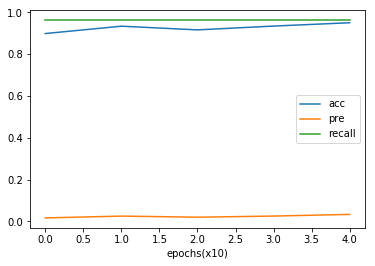

======================  Keras   ======================


In [93]:
# Recall, Precision, Acc
fig, ax =  plt.subplots()

acc = [h[2] for h in cb.hist]
pre = [h[1] for h in cb.hist]
recall = [h[0] for h in cb.hist]

ax.plot(acc, label='acc')
ax.plot(pre, label='pre')
ax.plot(recall, label='recall')

ax.set_xlabel('epochs(x10)')
ax.legend()

plt.show()

print('======================================================')
print('======================  Keras   ======================')
print('======================================================')